In [2]:
import matplotlib.pyplot as plt
import ast

In [3]:
def read_in_pretrained_data(filepath):
    with open(filepath) as f:
        lines = f.read()
    
    lines = lines.replace('tensor(', '')
    lines = lines.replace(', dtype=torch.float64)', '')
    my_dict = ast.literal_eval(lines)

    return my_dict['train_acc'], my_dict['test_acc'], my_dict['train_loss'], my_dict['test_loss']

In [4]:
def read_in_custom_cnn_data(filepath):
    my_dict = {}
    with open(filepath) as f:
        lines = f.readlines()
        
    for line in lines:
        title, data = line.split(':')
        data = data.replace('\n', '')
        
        my_dict[title] = ast.literal_eval(data)
        
    return my_dict['train_accuracy'], my_dict['test_accuracy'], my_dict['train_loss'], my_dict['test_loss']

In [5]:
def save_outputs(train_acc, test_acc, train_loss, test_loss, graph_path):
    epochs_range = range(15)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc, label="Training Accuracy", color='darkgreen')
    plt.plot(epochs_range, test_acc, label="Test Accuracy", color='red')
    plt.legend(loc="lower right")
    plt.title("Training and Test Accuracy")
    plt.yticks([x / 100 for x in range(50, 102, 5)])

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, label="Training Loss", color='darkgreen')
    plt.plot(epochs_range, test_loss, label="Test Loss", color='red')
    plt.legend(loc="upper right")
    plt.title("Training and Test Loss")
    plt.yticks([x / 100 for x in range(150, -1, -15)])

    plt.savefig(graph_path, bbox_inches='tight')

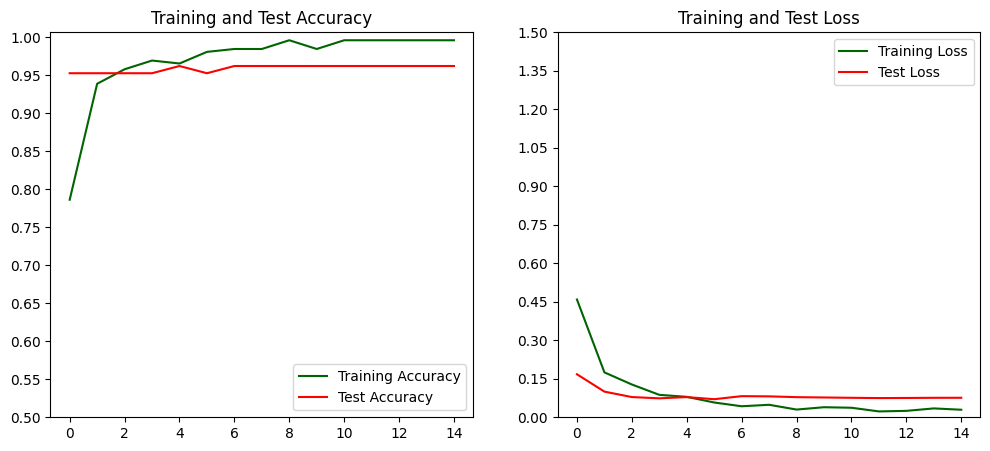

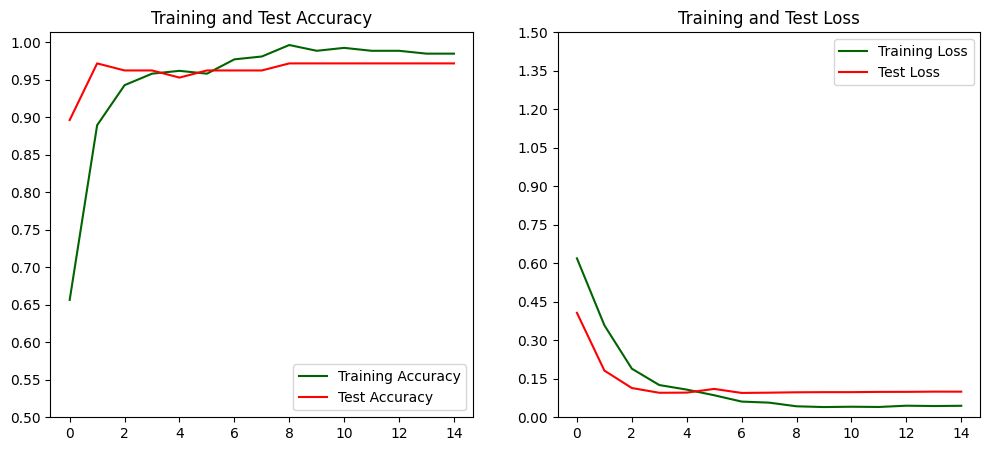

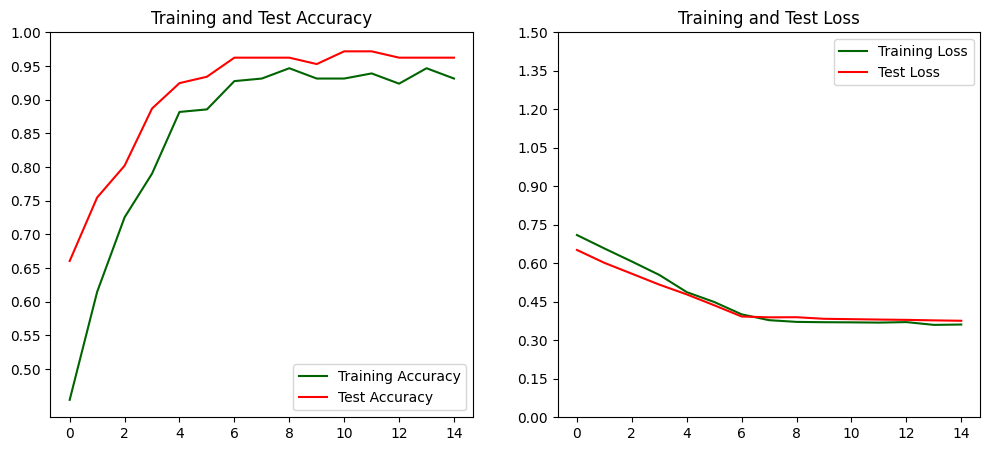

In [9]:
for batchsize in ['BW_batchsize_32']:
    for pretrained_model in ['alexnet', 'vgg', 'googlenet']:
        folder = f'../outputs/{batchsize}/reduced_learning_rates/{pretrained_model}/'
        file_name = f'{pretrained_model}_finetuning_15epochs_{batchsize.split("_")[-1]}batch_loss_accuracy.txt'
        graph_filename = 'standardised_graph.png'
        
        train_acc, test_acc, train_loss, test_loss = read_in_pretrained_data(folder+file_name)
        save_outputs(train_acc, test_acc, train_loss, test_loss, folder+graph_filename)
        


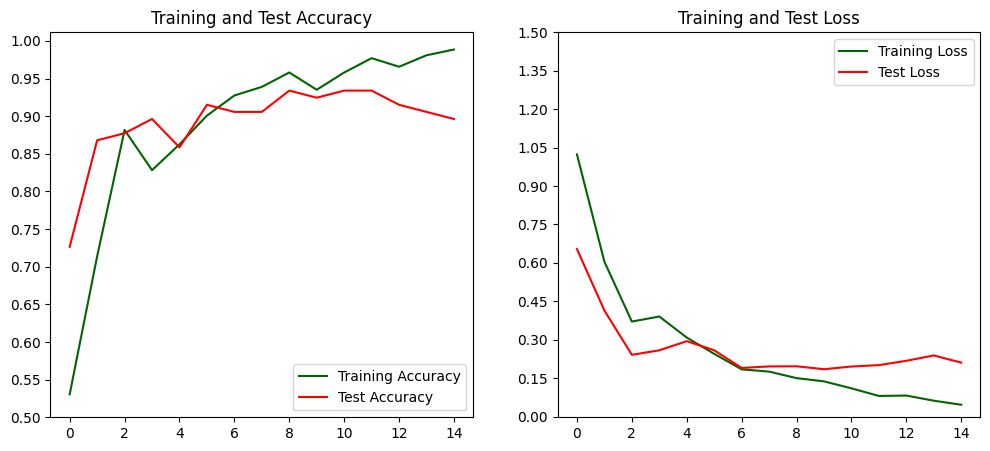

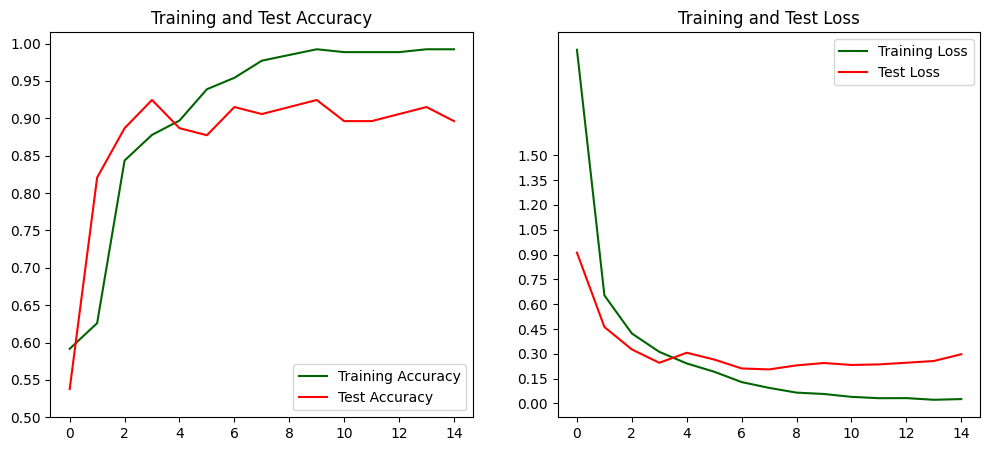

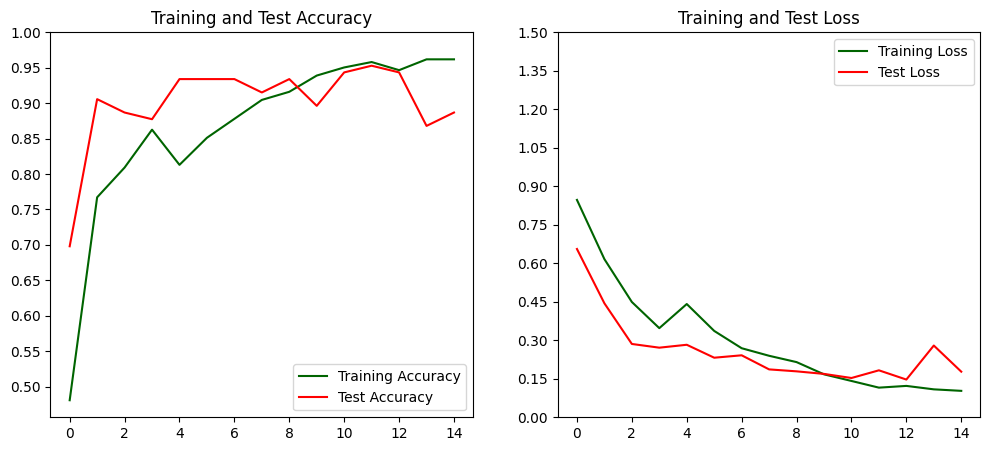

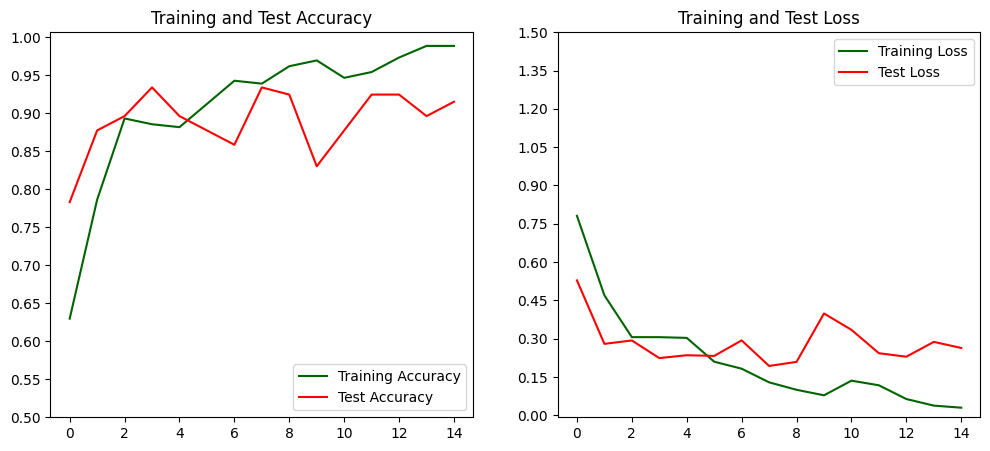

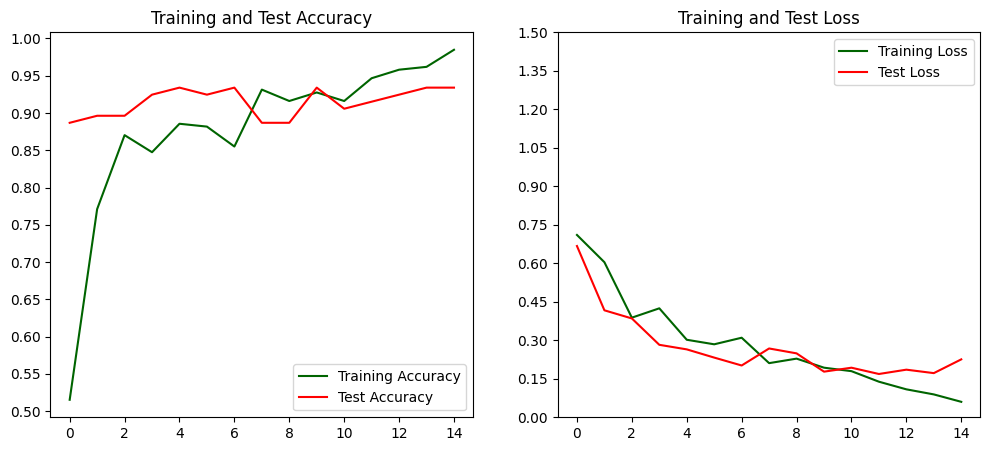

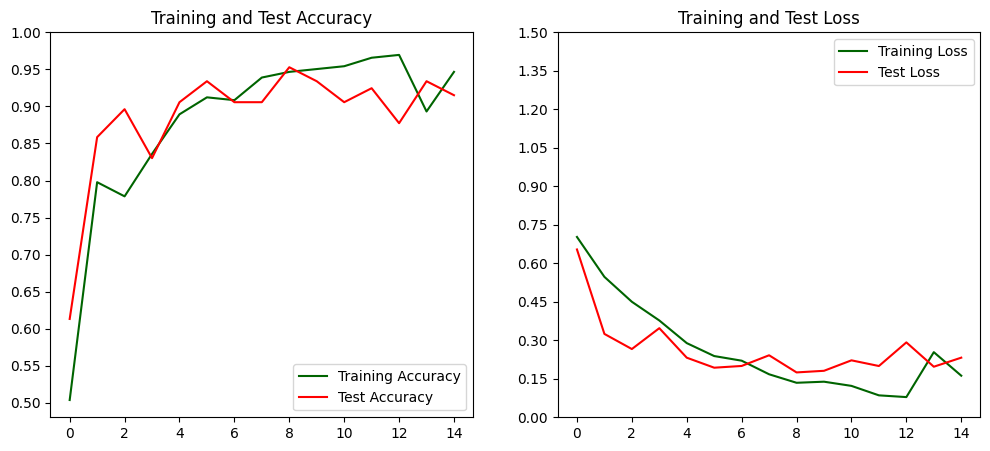

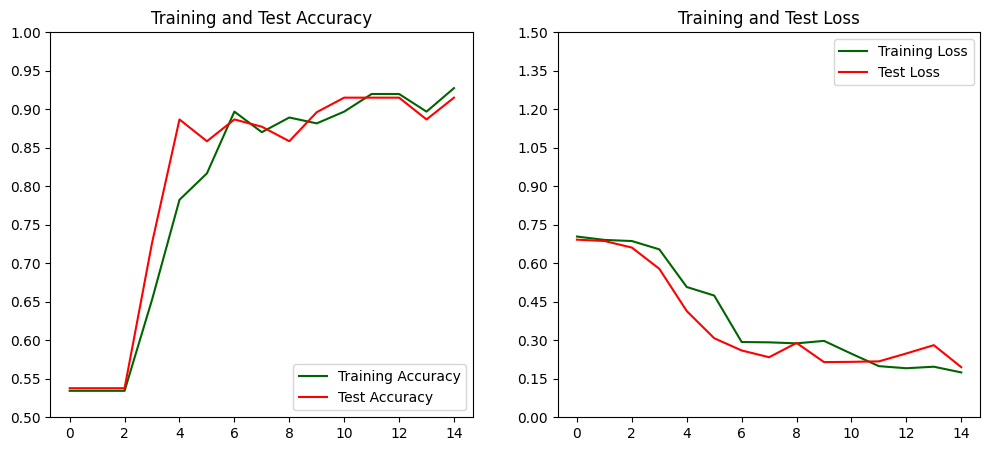

In [7]:
for batchsize in ['BW_batchsize_32']:
    for model_no in [ '01', '02', '03', '04', '05', '06','07']:
        model_name = 'model_' + model_no
        
        folder = f'../outputs/{batchsize}/{model_name}/'
        file_name = f'details.txt'
        graph_filename = 'standardised_graph.png'
        
        train_acc, test_acc, train_loss, test_loss = read_in_custom_cnn_data(folder+file_name)
        save_outputs(train_acc, test_acc, train_loss, test_loss, folder+graph_filename)
        